In [41]:
#install the dependencies
!pip install kaggle

In [42]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saqibhussain9","key":"517cff2d671d5552d17cc12704a0b6c3"}'}

In [43]:
#copy SSH Key

!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json


In [44]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
from zipfile import ZipFile
file_name = 'chest-xray-pneumonia.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [46]:
!pip install -q keras

In [47]:
import keras

In [67]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD 

In [49]:
#Initializing the CNN Model
classifier = Sequential()


#Step1: Convolution
classifier.add(Conv2D(64,(3,3), input_shape=(64,64,3), activation='relu'))

#Step 2: Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


#Step 3: Flattening
classifier.add(Flatten())

#Step 4: Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


#Step 5: Compiling the CNN Model

classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [50]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [51]:
input_shape[:2]

(150, 150)

In [52]:
#Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)


test = ImageDataGenerator(rescale=1./255)



In [59]:
train_set = train.flow_from_directory('chest_xray/train',
                                      target_size  = (64, 64),
                                      batch_size = 32,
                                      class_mode ='binary')



Found 5216 images belonging to 2 classes.


In [60]:
test_set = test.flow_from_directory('chest_xray/test',
                                      target_size  = (64, 64),
                                      batch_size = 32,
                                      class_mode='binary')



Found 624 images belonging to 2 classes.


In [61]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [62]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [57]:
#input_shape = (150,150,3)

In [65]:
history = classifier.fit_generator(train_set,
                                   steps_per_epoch=100,
                                   epochs=30, 
                                   validation_data=test_set,
                                   validation_steps=12)

Epoch 1/30
100/100 [==============================] - 55s 548ms/step - loss: 0.1475 - accuracy: 0.9431 - val_loss: 0.4527 - val_accuracy: 0.8516
Epoch 2/30
100/100 [==============================] - 55s 552ms/step - loss: 0.1574 - accuracy: 0.9375 - val_loss: 0.3319 - val_accuracy: 0.8750
Epoch 3/30
100/100 [==============================] - 55s 545ms/step - loss: 0.1441 - accuracy: 0.9447 - val_loss: 0.3516 - val_accuracy: 0.8932
Epoch 4/30
100/100 [==============================] - 55s 546ms/step - loss: 0.1553 - accuracy: 0.9425 - val_loss: 0.2373 - val_accuracy: 0.9141
Epoch 5/30
100/100 [==============================] - 55s 549ms/step - loss: 0.1517 - accuracy: 0.9397 - val_loss: 0.3190 - val_accuracy: 0.8854
Epoch 6/30
100/100 [==============================] - 54s 544ms/step - loss: 0.1448 - accuracy: 0.9434 - val_loss: 0.3727 - val_accuracy: 0.8802
Epoch 7/30
100/100 [==============================] - 55s 550ms/step - loss: 0.1315 - accuracy: 0.9475 - val_loss: 0.2727 - val_ac

In [68]:
type(history)

tensorflow.python.keras.callbacks.History

In [70]:
print(history.history['accuracy'])

[0.9431250095367432, 0.9375, 0.9446874856948853, 0.9424999952316284, 0.9396874904632568, 0.9434375166893005, 0.9474999904632568, 0.9456250071525574, 0.9456250071525574, 0.953125, 0.9459375143051147, 0.9468749761581421, 0.9534375071525574, 0.9540625214576721, 0.9534375071525574, 0.9490625262260437, 0.9553124904632568, 0.9534375071525574, 0.9565625190734863, 0.9528124928474426, 0.9574999809265137, 0.9593750238418579, 0.9553124904632568, 0.9571874737739563, 0.9596874713897705, 0.9606249928474426, 0.9581249952316284, 0.9537500143051147, 0.9609375, 0.9606249928474426]


In [72]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


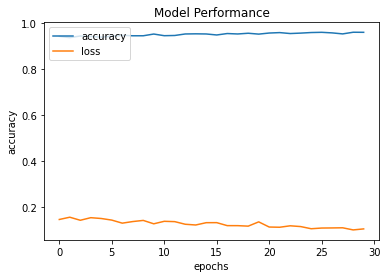

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','loss'], loc= 'upper left')
plt.show()

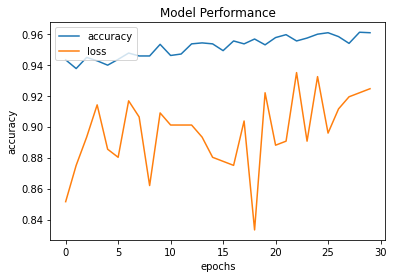

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','loss'], loc= 'upper left')
plt.show()

In [76]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [80]:
normal_image = image.load_img('chest_xray/test/NORMAL/IM-0001-0001.jpeg', target_size=(64,64))
normal_image = image.img_to_array(normal_image)
print(normal_image.shape)
normal_image = np.expand_dims(normal_image, axis=0)
print(normal_image.shape)
normal_image= normal_image/255

(64, 64, 3)
(1, 64, 64, 3)


In [81]:
prediction = classifier.predict(normal_image)

In [82]:
print(f'Probability of that patient to be a normal is: {prediction} ')

Probability of that patient to be a normal is: [[0.01477465]] 


In [85]:
history = classifier.predict_classes(normal_image)
print(history)

[[0]]


In [89]:
classifier.save('Pneumonia Detection using Chest XRay.h5')